深度学习是一种以深度计算堆栈为特征的机器学习方法。这种计算深度使得深度学习模型能够理清最具挑战性的现实数据集中发现的各种复杂和分层模式。

神经网络凭借其强大的功能和可扩展性，已成为深度学习的定义模型。神经网络由神经元组成，其中每个神经元单独执行简单的计算。神经网络的力量来自于这些神经元可以形成的连接的复杂性。


# Keras 中的线性单位


在 Keras 中创建模型的最简单方法是通过 keras.Sequential，它将神经网络创建为层堆栈

我们可以定义一个线性模型，接受三个输入特征并产生单个输出


In [1]:
from tensorflow import keras
from keras import layers


# 创建一个具有 1 个线性单元的网络，输入3个数据
model = keras.Sequential(
    [
        layers.Dense(units=1, input_shape=[3]),
    ]
)

2024-09-24 10:28:21.526272: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-24 10:28:21.562043: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 10:28:21.916776: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 10:28:21.919223: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-24 10:28:33.331298: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

4/4 [==============================] - 0s 1ms/step


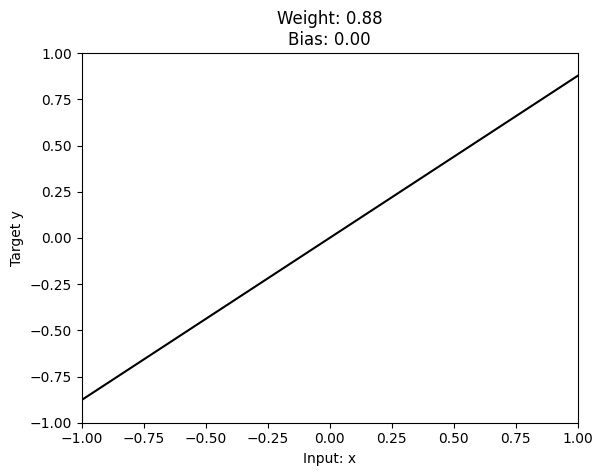

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.Sequential(
    [
        layers.Dense(1, input_shape=[1]),
    ]
)

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, "k")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights  # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

# 深度神经网络


神经网络通常将其神经元组织成层。当我们将具有一组公共输入的线性单元收集在一起时，我们得到了一个稠密层。


## 激活函数


事实证明，两个中间没有任何东西的稠密层并不比单个稠密层本身更好。密集的层次本身永远无法让我们脱离线和面的世界。我们需要的是非线性的东西。我们需要的是激活函数。

如果没有激活函数，神经网络只能学习线性关系。为了拟合曲线，我们需要使用激活函数。


激活函数的作用就是引入非线性，使神经网络能够处理更复杂的关系和模式。如果整个网络都是线性的（没有激活函数），那么无论多少层，最终都可以被简化成一个单层线性模型，这样的模型无法处理复杂的非线性问题


激活函数只是我们应用于每个层的输出（其激活）的函数。最常见的是整流功能 max(0, x)

整流器函数有一个图形，该图形是一条线，其中负部分“整流”为零。将函数应用于神经元的输出将使数据弯曲，使我们远离简单的线条。

当我们将整流器连接到线性单元时，我们得到一个整流线性单元或 ReLU。 （因此，通常将整流器函数称为“ReLU 函数”。）将 ReLU 激活应用于线性单元意味着输出变为 max(0, w \* x + b)


## 堆叠密集层


输出层之前的层有时被称为隐藏层，因为我们永远不会直接看到它们的输出

输入层 - 隐藏层 - 输出层


在神经网络的最后一层（即输出层）使用的是线性单元，也就是没有激活函数。这意味着网络在最后一层直接输出预测值，不经过像 sigmoid、softmax 等激活函数的非线性变换。这种结构适合回归任务，因为回归任务的目标是预测连续的实数值，例如房价、温度等。在回归任务中，输出的值可以是任意数值，而不需要像分类任务那样限制在某个范围内或是输出概率。分类任务（例如猫狗分类）则不同，分类问题的输出通常代表某个类别的概率或者是明确的类别标签，因此输出层通常需要一个激活函数

线性输出层适合回归问题，预测的是任意数值；而分类问题则需要在输出层引入激活函数，来规范输出的形式。


经过输出层时，最终的输出是线性还是非线性，取决于输出层是否使用激活函数。

如果输出层没有使用激活函数（如回归任务），则输出是线性的。这意味着即使之前的层经过了非线性激活函数的处理，输出层仍然只是对上一层的线性组合。因此，最终输出是线性结果。

如果输出层使用了激活函数（如分类任务），则输出是非线性的。激活函数将对线性输出进行非线性变换，从而使得最终输出具有非线性的特征。例如，在分类问题中，sigmoid 或 softmax 激活函数会将输出限制在 [0,1] 范围内，表示为概率。


## 构建序列模型


In [3]:
# 图中输入层的1为偏置项b，即wx+b
"""
在编写神经网络代码时，偏置项（bias） 通常不需要显式地写出来，因为大多数深度学习框架（如 TensorFlow、Keras）会默认为每个神经元自动添加偏置项。在代码中没有明确声明偏置项，是因为它们是模型的一部分，由框架在后台管理。
"""

from tensorflow import keras
from keras import layers

model = keras.Sequential(
    [
        # 隐藏的ReLU层
        layers.Dense(units=4, activation="relu", input_shape=[2]),
        # 第一个隐藏层包含4个神经元，使用ReLU激活函数，输入层包含2个输入单元
        layers.Dense(units=3, activation="relu"),
        # 第二个隐藏层包含3个神经元， 使用ReLU激活函数
        layers.Dense(units=1),
        # 输出层包含1个神经元
    ]
)

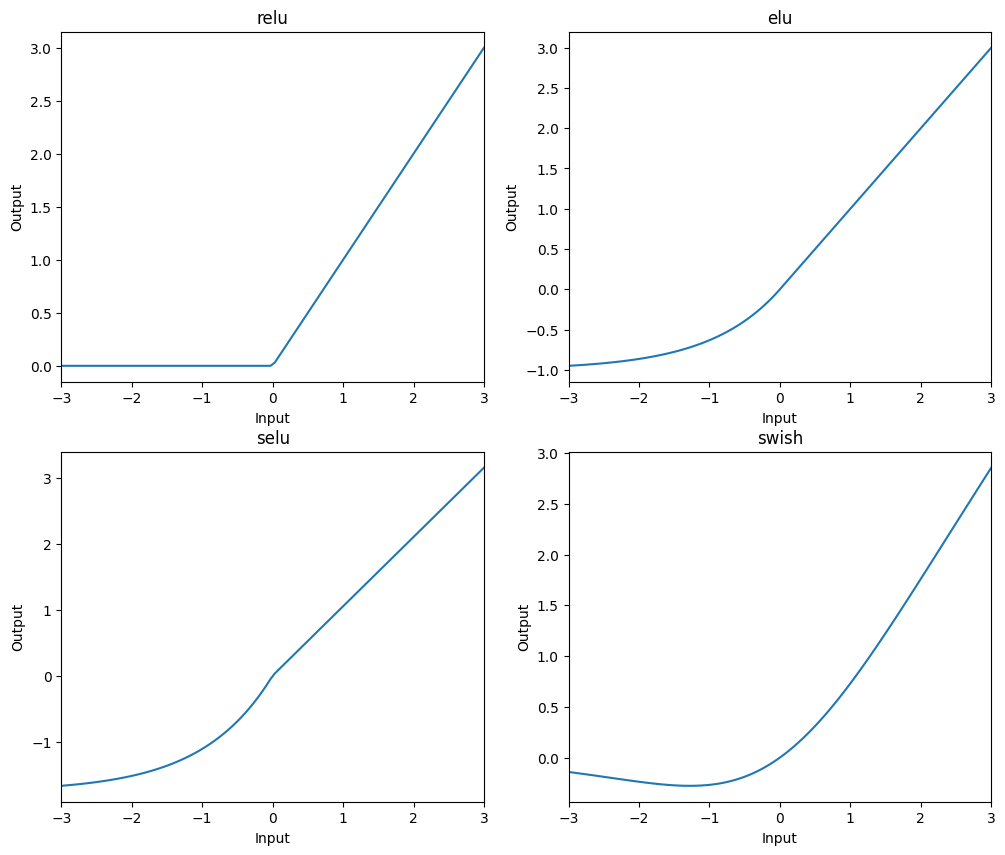

In [4]:
plt.figure(figsize=(12, 10), dpi=100)

# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation("relu")

x1 = tf.linspace(-3.0, 3.0, 100)
y1 = activation_layer(x1)  # once created, a layer is callable just like a function

plt.subplot(2, 2, 1)
plt.plot(x1, y1)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("relu")
# plt.show()

# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation("elu")

x2 = tf.linspace(-3.0, 3.0, 100)
y2 = activation_layer(x2)  # once created, a layer is callable just like a function

plt.subplot(2, 2, 2)
plt.plot(x2, y2)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("elu")
# plt.show()

# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation("selu")

x3 = tf.linspace(-3.0, 3.0, 100)
y3 = activation_layer(x3)  # once created, a layer is callable just like a function

plt.subplot(2, 2, 3)
plt.plot(x3, y3)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("selu")
# plt.show()

# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation("swish")

x4 = tf.linspace(-3.0, 3.0, 100)
y4 = activation_layer(x4)  # once created, a layer is callable just like a function

plt.subplot(2, 2, 4)
plt.plot(x4, y4)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("swish")
plt.show()

# 随机梯度下降


与所有机器学习任务一样，我们从一组训练数据开始。训练数据中的每个示例都包含一些特征（输入）和预期目标（输出）。
训练网络意味着调整其权重，使其能够将特征转化为目标。例如，在 80 种谷物数据集中，我们想要一个网络能够获取每种谷物
的“糖”、“纤维”和“蛋白质”含量，并预测该谷物的“卡路里”。如果我们能够成功地训练一个网络来做到这一点，它的权重必须以
某种方式表示这些特征与训练数据中表达的目标之间的关系。


除了训练数据之外，我们还需要两件事：

- 衡量网络预测效果的“损失函数”。
- 一个“优化器”，可以告诉网络如何改变其权重。


## 损失函数

我们已经了解了如何设计网络架构，但还没有了解如何告诉网络要解决什么问题。这就是损失函数的工作。
（是什么问题）

损失函数衡量目标真实值与模型预测值之间的差异。不同的问题需要不同的损失函数。我们一直在研究回归问题，其中的任务是预测一些数值——80 种谷物中的卡路里、红酒质量的评级。其他回归任务可能是预测房屋的价格或汽车的燃油效率。

回归问题的常见损失函数是平均绝对误差(mean absolute error)或 MAE。对于每个预测 y_pred，MAE 通过绝对差 abs(y_true - y_pred) 来测量与真实目标 y_true 的差异。

数据集上的总 MAE 损失是所有这些绝对差值的平均值。在训练期间，模型将使用损失函数作为找到其权重的正确值的指南（损失越低越好）。换句话说，损失函数告诉网络它的目标。


## 优化器 - 随机梯度下降

我们已经描述了我们希望网络解决的问题，但现在我们需要说明如何解决它。这是优化器的工作。优化器是一种调整权重以最小化损失的算法。
（怎么解决问题）

事实上，深度学习中使用的所有优化算法都属于随机梯度下降。它们是逐步训练网络的迭代算法。训练的一步是这样的：

1. 对一些训练数据进行采样并通过网络运行它以进行预测。
2. 测量预测值和真实值之间的损失。
3. 最后，向使损失较小的方向调整权重。

然后一遍又一遍地这样做，直到损失达到你想要的程度（或者直到它不再减少为止）。


<img src="https://storage.googleapis.com/kaggle-media/learn/images/rFI1tIk.gif" alt="使用随机梯度下降训练神经网络"
width="60%"/>


每次迭代的训练数据样本称为“小批量”（或通常简称“批次”），而完整一轮的训练数据称为“训练轮次”。您训练的轮次数是网络将看到每个训练示例的次数。

该动画显示了使用 SGD 训练线性模型。浅红点描绘了整个训练集，而实心红点是小批量。每次 SGD 看到一个新的小批量时，它都会将权重（w 斜率和 b y 截距）移向该批次的正确值。一批又一批，这条线最终收敛到最佳拟合。可以看到，随着权重越接近其真实值，损失就越小。


## 学习率和批量大小


该线仅在每个批次的方向上进行小幅移动（而不是一路移动）。这些变化的大小由学习率决定。较小的学习率意味着网络在其权重收敛到最佳值之前需要看到更多的小批量。

学习率和小批量的大小是对 SGD 训练影响最大的两个参数。它们的相互作用通常很微妙，并且这些参数的正确选择并不总是显而易见的。 （我们将在练习中探讨这些影响。）

对于大多数工作来说，无需进行广泛的超参数搜索即可获得满意的结果。 Adam 是一种 SGD 算法，具有自适应学习率，使其适用于大多数问题，无需任何参数调整（从某种意义上来说，它是“自调整”）。 Adam 是一位出色的通用优化器。


## 添加损失和优化器


定义模型后，您可以使用模型的编译方法添加损失函数和优化器

model.compile(
optimizer="adam",
loss="mae",
)

> 请注意，我们可以仅使用字符串来指定损失和优化器。您还可以直接通过 Keras API 访问这些——例如，如果您想调整参数——但对我们来说，默认值就可以正常工作

梯度是一个向量，告诉我们权重需要朝哪个方向移动。更准确地说，它告诉我们如何改变权重以使损失变化最快。我们将我们的过程称为梯度下降，因为它使用梯度将损失曲线下降到最小值。随机意味着“由机会决定”。我们的训练是随机的，因为小批量是数据集中的随机样本。这就是为什么它被称为 SGD！


## Example


该数据集包含约 1600 种葡萄牙红酒的理化测量值。还包括盲品测试中每种葡萄酒的质量评级。我们通过这些测量来预测葡萄酒的感知质量


In [5]:
import pandas as pd
from IPython.display import display

# display相当于print的升级版，可以更好的显示表格、HTML等格式

path = "input/red-wine.csv"
red_wine = pd.read_csv(path)

# 创建训练和验证数据集
df_train = red_wine.sample(frac=0.7, random_state=0)
# sample的作用是随机抽取原始数据集的样本，frac表示抽取70%
df_vaild = red_wine.drop(df_train.index)
# 删除训练集作为验证集
display(df_train.head())
display(df_train.shape)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


(1119, 12)

归一化（或标准化）是深度学习和其他机器学习任务中常见的数据预处理步骤。它有助于提高模型的训练效率和预测性能

归一化公式为：

$$
\text{scaled value} = \frac{\text{original value} - \text{min}}{\text{max} - \text{min}}
$$


In [6]:
# 归一化处理
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_vaild = (df_vaild - min_) / (max_ - min_)
display(df_vaild.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.000000,0.076923,0.072790,0.140845,0.098940,0.588728,0.621359,0.139394,0.153846,0.4
3,0.584071,0.109589,0.708861,0.076923,0.071057,0.225352,0.190813,0.603960,0.281553,0.151515,0.215385,0.6
7,0.238938,0.363014,0.000000,0.023077,0.053726,0.197183,0.053004,0.345011,0.504854,0.084848,0.246154,0.8
11,0.256637,0.260274,0.455696,0.400000,0.064125,0.225352,0.339223,0.588728,0.466019,0.284848,0.323077,0.4
23,0.345133,0.253425,0.139241,0.107692,0.086655,0.112676,0.215548,0.512567,0.291262,0.121212,0.153846,0.4


**axis=0：表示沿着 行 的方向操作。对于 drop 方法，axis=0 意味着删除 行。**

**axis=1：表示沿着 列 的方向操作。对于 drop 方法，axis=1 意味着删除 列。**


In [7]:
# 将特征和目标变量分裂
train_X = df_train.drop("quality", axis=1).values
valid_X = df_vaild.drop("quality", axis=1).values
train_y = df_train["quality"].values
valid_y = df_vaild["quality"].values

display(train_X.shape)

(1119, 11)

11 列意味着 11 个输入。 我们选择了一个包含超过 1500 个神经元的三层网络。该网络应该能够学习数据中相当复杂的关系。


In [8]:
from tensorflow import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(512, activation="relu", input_shape=[11]),
        layers.Dense(512, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(1),
    ]
)

决定模型的架构应该是一个过程的一部分。从简单开始并使用验证损失作为指导。定义模型后，我们编译优化器和损失函数。


In [9]:
model.compile(
    optimizer="adam",
    loss="mae",
)

现在我们准备开始训练了！我们告诉 Keras 一次向优化器提供 256 行训练数据（batch_size），并在整个数据集（epoch）中执行 10 次。


In [10]:
history = model.fit(
    train_X,
    train_y,
    validation_data=(valid_X, valid_y),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 40ms/step - loss: 0.2773 - val_loss: 0.1377
Epoch 2/10
5/5 [==============================] - 0s 14ms/step - loss: 0.1409 - val_loss: 0.1261
Epoch 3/10
5/5 [==============================] - 0s 14ms/step - loss: 0.1228 - val_loss: 0.1182
Epoch 4/10
5/5 [==============================] - 0s 14ms/step - loss: 0.1132 - val_loss: 0.1076
Epoch 5/10
5/5 [==============================] - 0s 13ms/step - loss: 0.1086 - val_loss: 0.1062
Epoch 6/10
5/5 [==============================] - 0s 14ms/step - loss: 0.1051 - val_loss: 0.1058
Epoch 7/10
5/5 [==============================] - 0s 13ms/step - loss: 0.1037 - val_loss: 0.1042
Epoch 8/10
5/5 [==============================] - 0s 13ms/step - loss: 0.1019 - val_loss: 0.1022
Epoch 9/10
5/5 [==============================] - 0s 14ms/step - loss: 0.1020 - val_loss: 0.0997
Epoch 10/10
5/5 [==============================] - 0s 13ms/step - loss: 0.1011 - val_loss: 0.0992


可以看到 Keras 会在模型训练时向您通报损失的最新情况。 通常，查看损失的更好方法是将其绘制出来。 fit 方法实际上在 History 对象中保存了训练过程中产生的损失的记录。我们将数据转换为 Pandas 数据框，这使得绘图变得容易。


In [11]:
import matplotlib

print(matplotlib.__version__)

3.3.3


<AxesSubplot:>

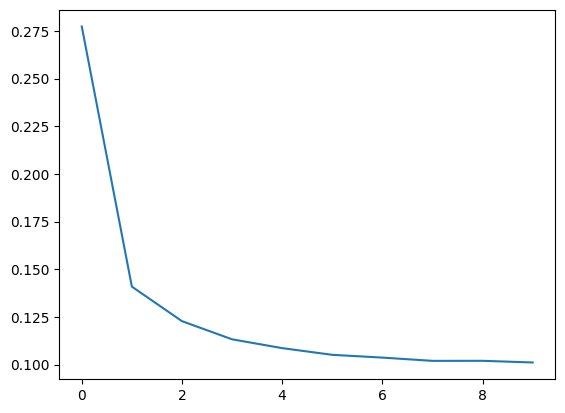

In [12]:
import pandas as pd


# 将训练历史记录转换为数据帧
history_df = pd.DataFrame(history.history)
# 使用 Pandas 原生绘图方法
history_df["loss"].plot()

请注意损失如何随着时间的流逝而趋于平稳。当损失曲线变得像这样水平时，这意味着模型已经学到了它能学到的一切，并且没有理由继续额外的时期。

> 在机器学习中，“噪声”指的是数据中的随机或无关的信息，这些信息对模型的训练和预测过程没有帮助，甚至可能导致模型性能下降。


# 过拟合和欠拟合

通过额外容量或提前停止来提高性能。


之前，我们 Keras 将保留训练模型期间训练和验证损失的历史记录。现在我们将学习如何解释这些学习曲线以及如何使用它们来指导模型开发。特别是，我们将检查学习曲线是否存在欠拟合和过拟合的证据，并研究一些纠正它的策略。

## 解释学习曲线

您可能会将训练数据中的信息视为两种：信号和噪声。信号是概括的部分，可以帮助我们的模型根据新数据进行预测。噪声是仅适用于训练数据的部分；噪声是来自现实世界中的数据的所有随机波动，或者是所有偶然的、非信息性的模式，这些模式实际上不能帮助模型进行预测。噪音是该部件可能看起来有用但实际上没有用。

信号是指数据中包含的有意义的、可被模型学习到的模式。它代表了能够帮助模型做出准确预测的特征和规律。例如，在房价预测模型中，房屋面积、地理位置等因素就是信号，因为它们对房价有直接的影响。学习信号是我们训练模型的目标。

噪声是指数据中不可预测的、随机的或无关的信息。它可能来源于测量误差、数据收集过程中的偏差或环境中的随机干扰。例如，在房价数据中，偶尔会有一些由于特殊原因而特别高或低的房价数据，这些数据可能对模型无益甚至有害。

我们通过选择最小化训练集损失的权重或参数来训练模型。然而，您可能知道，为了准确评估模型的性能，我们需要在一组新数据（验证数据）上对其进行评估。

当我们训练模型时，我们会逐个批次绘制训练集上的损失。为此，我们还将添加验证数据图。这些图我们称之为学习曲线。为了有效地训练深度学习模型，我们需要能够解释它们。

<img src="https://storage.googleapis.com/kaggle-media/learn/images/tHiVFnM.png" alt="验证损失给出了对未见数据的预期误差的估计。" width="40%"/>

理想情况下，我们将创建能够学习所有信号而不学习任何噪声的模型。这实际上永远不会发生。相反，我们进行交易。我们可以让模型以学习更多噪声为代价来学习更多信号。只要交易对我们有利，验证损失就会继续减少。然而，在某一点之后，交易可能会对我们不利，成本超过收益，验证损失开始上升。

<img src="https://storage.googleapis.com/kaggle-media/learn/images/eUF6mfo.png" alt="验证损失给出了对未见数据的预期误差的估计。" width="40%"/>

这种权衡表明，训练模型时可能会出现两个问题：信号不足或噪声太多。训练集欠拟合是指由于模型没有学习到足够的信号而导致损失没有达到应有的水平。过度拟合训练集是指由于模型学习了太多噪声而导致损失没有达到应有的水平。训练深度学习模型的技巧是找到两者之间的最佳平衡。 我们将研究几种从训练数据中获取更多信号同时减少噪声量的方法。

## Capacity(容量)

模型的容量是指它能够学习的模式的大小和复杂性。对于神经网络来说，这很大程度上取决于它有多少个神经元以及它们如何连接在一起。如果您的网络似乎不适合数据，您应该尝试增加其容量。

您可以通过加宽网络（向现有层添加更多单元）或使其更深（添加更多层）来增加网络的容量。更宽的网络更容易学习更多的线性关系，而更深的网络更喜欢更多的非线性关系。哪个更好取决于数据集。

```python
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])
```

您将在练习中探索网络容量如何影响其性能。

## Early Stopping(早停)

我们提到，当模型过于急切地学习噪声时，验证损失可能会在训练期间开始增加。为了防止这种情况，只要验证损失似乎不再减少，我们就可以停止训练。以这种方式中断训练称为早停法。

<img src="https://storage.googleapis.com/kaggle-media/learn/images/eP0gppr.png" alt="我们保持验证损失最小的模型"
width="40%"/>

一旦我们检测到验证损失开始再次上升，我们就可以将权重重置回最小值发生的位置。这确保了模型不会继续学习噪声并过度拟合数据。

提前停止训练还意味着我们在网络完成信号学习之前过早停止训练的危险较小。因此，除了防止训练时间过长而导致过拟合之外，提前停止还可以防止训练时间不够而导致欠拟合。只需将您的训练周期设置为某个较大的数字（超出您的需要），然后提前停止即可完成其余的工作。

## 加入早停法

```python
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # 改进的最小变量
    patience=20, # 多少个训练批次前停止训练
    restore_best_weights=True,
)
```

这些参数表示：“如果在过去 20 个 epoch 中验证损失没有至少改善 0.001，则停止训练并保留您找到的最佳模型。”有时很难判断验证损失的增加是由于过度拟合还是仅仅由于随机批次变化。这些参数允许我们设置一些关于何时停止的容差。

正如我们将在示例中看到的，我们将将此回调与损失和优化器一起传递给 fit 方法。

## Example - Train a Model with Early Stopping

我们将增加该网络的容量，同时添加提前停止回调以防止过度拟合。


In [13]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv("input/red-wine.csv")

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop("quality", axis=1)
X_valid = df_valid.drop("quality", axis=1)
y_train = df_train["quality"]
y_valid = df_valid["quality"]

display(X_train.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154
979,0.672566,0.226027,0.620253,0.038462,0.071057,0.028169,0.000000,0.520183,0.252427,0.181818,0.307692


现在让我们增加网络的容量。我们将选择一个相当大的网络，但一旦验证损失显示出增加的迹象，就依靠回调来停止训练。


In [14]:
from tensorflow import keras
from keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    # 如果在过去 20 个 epoch 中验证损失没有至少改善 0.001，则停止训练并保留您找到的最佳模型
    min_delta=0.01,
    patience=20,
    restore_best_weights=True,
)

model = keras.Sequential(
    [
        layers.Dense(512, activation="relu", input_shape=[11]),
        layers.Dense(512, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(1),
    ]
)

model.compile(
    optimizer="adam",
    loss="mae",
)

定义回调后，将其添加为 fit 中的参数（可以有多个，因此将其放入列表中）。使用提前停止时选择大量的训练批次，超出您的需要。


Minimum validation loss: 0.0923505499958992


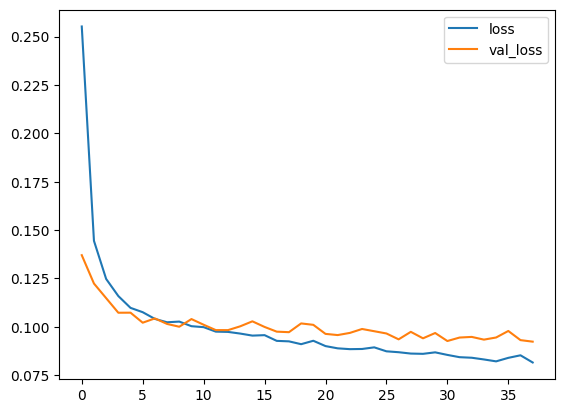

In [15]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ["loss", "val_loss"]].plot()
print("Minimum validation loss: {}".format(history_df["val_loss"].min()))

Keras 在满 500 个 epoch 之前就停止了训练！


# Dropout 和批量归一化

添加这些特殊层可以防止过度拟合并稳定训练。

我们将学习两种特殊层，它们本身不包含任何神经元，但添加了一些有时可以以多种方式使模型受益的功能。两者都在现代建筑中常用。

## Dropout

在深度学习中，"Dropout 层" 是一种用于缓解过拟合（overfitting）问题的技术。

在上一节课中，我们讨论了过拟合是如何由网络在训练数据中学习到虚假的模式（spurious patterns）引起的。网络通常依赖于非常特定的权重组合来识别这些虚假模式，这种组合可以被看作是一种**权重的共谋**。由于这种组合非常特定，它们往往是脆弱的：移除其中的一个权重，这个共谋就会瓦解。

这就是 Dropout 背后的思想。为了打破这些权重共谋，在每一步训练中，我们会随机舍弃一部分层的输入单元，使得网络更难以学习训练数据中的虚假模式。相反，网络被迫去寻找更广泛、更加通用的模式，这些模式的权重组合通常更加稳健。

<img src="https://storage.googleapis.com/kaggle-media/learn/images/a86utxY.gif" alt="两个隐藏层之间添加了 50% 的 dropout。">

您还可以将 dropout 视为创建一种网络集合。预测将不再由一个大网络做出，而是由较小网络组成的委员会做出。委员会中的个人往往会犯不同类型的错误，但同时又是正确的，这使得委员会作为一个整体比任何个人都更好。 （如果您熟悉随机森林作为决策树的集合，那么这是相同的想法。）

## Adding Dropout

在 Keras 中，Drop 参数 rate 定义了要关闭的输入单元的百分比。将 Dropout 图层放在您想要应用 Dropout 的图层之前：

```python
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
    # ...
])
```

## Batch Normalization

批量归一化

我们将看到的下一个特殊层执行“批量归一化”（或“batchnorm”），这可以帮助纠正缓慢或不稳定的训练。

对于神经网络，通常最好将所有数据放在一个通用的尺度上，也许可以使用 scikit-learn 的 StandardScaler 或 MinMaxScaler 之类的东西。原因是 SGD 会根据数据产生的激活大小按比例改变网络权重。倾向于产生不同大小激活的特征可能会导致训练行为不稳定。

StandardScaler 和 MinMaxScaler 是 scikit-learn 中用于数据预处理的两种标准化方法，它们的作用主要是对特征进行缩放，以改善模型的训练效果。

StandardScaler：

通过去均值和方差缩放特征，使每个特征的均值为 0，标准差为 1。
适用于数据呈正态分布的情况。
公式为：

$$
z = \frac{x - \mu}{\sigma}
$$

其中
𝜇 是均值，𝜎 是标准差

MinMaxScaler：

将特征缩放到指定的范围（通常是 [0, 1]）。
适用于数据没有明显的正态分布，且需要保持特征间的相对比例。
公式为：

$$
x' = \frac{x - X_{min}}{X_{max} - X_{min}}
$$

其中 𝑋𝑚𝑖𝑛 和 𝑋𝑚𝑎𝑥 分别是特征的最小值和最大值

现在，如果在数据进入网络之前对数据进行标准化是件好事，也许在网络内部进行标准化会更好！事实上，我们有一种特殊的层可以做到这一点，即批量归一化层。批次归一化层会查看每个批次的数据，首先使用批次自身的均值和标准差对批次进行归一化，然后使用两个可训练的缩放参数将数据置于新的尺度上。实际上，Batchnorm 对其输入执行了一种协调的重新调整。

最常见的是，添加批归一化作为优化过程的辅助（尽管有时它也可以帮助预测性能）。具有批量归一化的模型往往需要更少的时期来完成训练。此外，batchnorm 还可以修复各种可能导致训练“卡住”的问题。特别是当您在训练期间遇到问题时,考虑向您的模型添加批量归一化

## Adding Batch Normalization

看来批量归一化几乎可以在网络中的任何点使用。你可以把它放在一层之后

```python
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),
# 或层与其激活函数之间
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),
```

如果将其添加为网络的第一层，它可以充当一种自适应预处理器，替代 Sci-Kit Learn 的 StandardScaler 之类的东西。

## Example - Using Dropout and Batch Normalization

添加 dropout 来控制过度拟合和批量归一化以加快优化速度。这次，我们也将不再对数据进行标准化，以演示批量归一化如何稳定训练。

> 添加 dropout 时，您可能需要增加 Dense 层中的单元数量。


In [16]:
import tensorflow

print(tensorflow.__version__)

2.13.1


<AxesSubplot:>

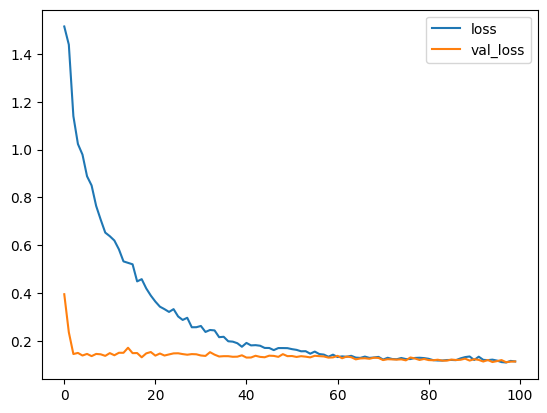

In [17]:
from tensorflow import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(1024, activation="relu", input_shape=[11]),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(1024, activation="relu"),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(1024, activation="relu"),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(1),
    ]
)

model.compile(
    optimizer="adam",
    loss="mae",
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)

# 展示图象
history_df = pd.DataFrame(history.history)
history_df.loc[:, ["loss", "val_loss"]].plot()

如果在使用数据进行训练之前对数据进行标准化，通常会获得更好的性能。然而，我们能够使用原始数据，这表明批量归一化在更困难的数据集上是多么有效。

# 二分类
将深度学习应用于另一项常见任务。

到目前为止，在本课程中，我们已经了解了神经网络如何解决回归问题。现在我们将把神经网络应用于另一个常见的机器学习问题：分类。到目前为止我们学到的大部分内容仍然适用。主要区别在于我们使用的损失函数以及我们希望最终层产生什么样的输出。

## Binary Classification

分类为两类之一是常见的机器学习问题。您可能想要预测客户是否有可能进行购买、信用卡交易是否存在欺诈、深空信号是否显示新行星的证据或疾病的医学测试证据。这些都是二元分类问题。

在原始数据中，类可能由“是”和“否”或“狗”和“猫”等字符串表示。在使用这些数据之前，我们将分配一个类标签：一个类为 0，另一个类为 1。分配数字标签会将数据置于神经网络可以使用的形式中。

## Accuracy and Cross-Entropy
准确性和交叉熵

准确性是衡量分类问题成功与否的众多指标之一。准确率是正确预测与总预测的比率：准确率=正确数/总计。始终正确预测的模型的准确度得分为 1.0。在其他条件相同的情况下，只要数据集中的类以大致相同的频率出现，准确性就是一个合理的指标。

准确性（以及大多数其他分类指标）的问题在于它不能用作损失函数。 SGD 需要一个平滑变化的损失函数，但准确度（作为计数的比率）会“跳跃”变化。因此，我们必须选择一个替代函数来充当损失函数。这个替代品就是交叉熵函数。

现在，回想一下损失函数定义了训练期间网络的目标。通过回归，我们的目标是最小化预期结果和预测结果之间的距离。我们选择 MAE 来测量这个距离。

对于分类，我们想要的是概率之间的距离，这就是交叉熵所提供的。交叉熵是一种衡量从一个概率分布到另一个概率分布的距离的度量。

<img src="https://storage.googleapis.com/kaggle-media/learn/images/DwVV9bR.png" alt="交叉熵惩罚错误的概率预测"
width="40%">

我们的想法是，我们希望我们的网络以 1.0 的概率预测正确的类别。预测概率距离 1.0 越远，交叉熵损失就越大。

我们使用交叉熵的技术原因有点微妙，但是本节的主要内容就是：使用交叉熵进行分类损失；您可能关心的其他指标（例如准确性）往往会随之提高。

## Making Probabilities with the Sigmoid Function
使用 Sigmoid 函数计算概率

交叉熵和准确度函数都需要概率作为输入，即从 0 到 1 的数字。为了将密集层产生的实值输出转换为概率，我们附加了一种新的激活函数，即 sigmoid 激活

<img src="https://storage.googleapis.com/kaggle-media/learn/images/FYbRvJo.png" alt="sigmoid函数将实数映射到区间[0,1]"
width="40%">

为了获得最终的类别预测，我们定义阈值概率。通常情况下，该值为 0.5，因此四舍五入将为我们提供正确的类别：低于 0.5 表示具有标签 0 的类别，0.5 或以上表示具有标签 1 的类别。0.5 阈值是 Keras 默认使用的准确度指标。

## Example - Binary Classification
电离层数据集包含从聚焦于地球大气层电离层的雷达信号获得的特征。任务是确定信号是否表明存在某种物体，或者只是空气。

In [18]:
import pandas as pd
from IPython.display import display

# 读取数据集
ion = pd.read_csv("/home/lc/code/ai/input/ion.csv")
display(ion.head())

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
1,2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
2,3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
3,4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
4,5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [19]:
# 复制数据集防止原文件被篡改
df = ion.copy()
# 对类别进行手动编码
df["Class"] = df["Class"].map({"good": 1, "bad": 0})
display(df.head())

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


**不管是任何情况，axis=0都是在一列上进行操作，axis=1是对一行数据进行操作**

对于sum, max, min, mean方法，当：

axis=1，是对每一行数据进行处理，则计算每一行的sum, max, min, mean值

axis=0，是对每一列书进行处理，则计算一个列的sum, max, min, mean值

对于drop方法，当：

axis=1，是对每一行数据进行删除，则删除一行数据的空白值

axis=0，是对每一列数据进行删除，则删除一列数据

**一行数据成为样本，不是一个格子的数据才成为样本**

In [27]:
# 数据集划分
df_train = df.sample(frac=0.7, random_state=0)
df_vaild = df.drop(df_train.index)

# 归一化处理
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_vaild = (df_vaild - min_) / (max_ - min_)

# 对缺失值使用删除法
df_train.dropna(axis=1, inplace=True)
# inplace参数表示是否在原数据中进行操作
df_vaild.dropna(axis=1, inplace=True)

X_train = df_train.drop("Class", axis=1)
X_valid = df_vaild.drop("Class", axis=1)
y_train = df_train["Class"]
y_valid = df_vaild["Class"]

X_train.head()
# print(X_train.shape[1])
# X_train.columns

,Unnamed: 0,V1,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34
6,0.014327,1.0,0.987940,0.44699,0.973005,0.396,0.96403,0.358250,0.929980,0.36329,...,0.613960,0.09183,0.568295,0.08745,0.52303,0.088025,0.47869,0.09341,0.43084,0.095125
52,0.146132,1.0,1.000000,1.00000,1.000000,1.000,0.95505,1.000000,0.365150,1.00000,...,0.950070,0.00000,1.000000,0.00000,1.00000,0.000000,1.00000,0.32657,1.00000,0.674225
114,0.323782,1.0,0.956765,0.90793,0.135135,1.000,0.30267,0.778675,0.527025,0.64865,...,0.499985,0.50001,0.499995,0.50000,0.50000,0.500000,0.50000,0.50000,0.50000,0.500000
45,0.126074,0.0,0.500000,0.50000,0.500000,0.500,0.50000,0.500000,1.000000,1.00000,...,0.000000,0.00000,0.000000,0.00000,0.00000,1.000000,1.00000,0.50000,0.50000,0.500000
106,0.300860,1.0,0.500000,0.50000,0.500000,0.500,0.50000,0.500000,0.500000,0.50000,...,0.500000,0.50000,1.000000,0.55488,0.50000,0.500000,0.50000,0.50000,0.50000,0.500000


我们将像回归任务一样定义我们的模型，但有一个例外。在最后一层中包含“Sigmoid”激活，以便模型产生类别概率。

In [ ]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', )
])

